In [ ]:
import pandas as pd
#import geopandas as gpd
import PIL
import io

In [ ]:
!pip install geopandas

     |████████████████████████████████| 962kB 2.7MB/s 
     |████████████████████████████████| 14.7MB 311kB/s 
     |████████████████████████████████| 10.9MB 12.4MB/s 


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
downloaded = drive.CreateFile({'id':'1tI7w_ObmE6NFBSg-jtV8yPTzg0W3ZB-e'}) # replace the id with id of file you want to access
downloaded.GetContentFile('time_series_covid19_confirmed_global.csv') 

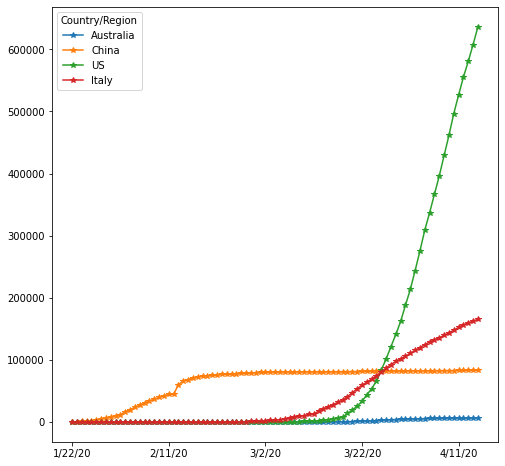

In [ ]:
# Reading in the csv data
data = pd.read_csv('time_series_covid19_confirmed_global.csv')

# Group the data by the country 
data = data.groupby('Country/Region').sum()

# Drop Lat and Lon columns
data = data.drop(columns = ['Lat', 'Long'])

#Create a transpose of the dataframe 
data_transposed  = data.T
data_transposed.plot(y = ['Australia', 'China', 'US', 'Italy'], use_index = True, figsize = (8,8), marker = '*')



In [ ]:
downloaded = drive.CreateFile({'id':'1yNOpUGf1SFRrXUirj5f4LkWHqmzQxS8G'}) # replace the id with id of file you want to access
downloaded.GetContentFile('World_Map.shp') 

In [ ]:
import geopandas as gpd
world = gpd.read_file("/content/World_Map.shp")

# The "head" function prints out the first five rows in full, so you can see
# the columns in the data set too! 

world.head()
#world = gpd.read_file('World_Map.shp')

,geometry
0,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."


In [ ]:
#shapefile.plot(column='', figsize=(16,8))
world = gpd.read_file('World_Map.shp')
print("I am done")
type(world)
world.head(10)

I am done


,geometry
0,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."
5,"MULTIPOLYGON (((11.75083 -16.75528, 11.77500 -..."
6,"MULTIPOLYGON (((-170.54251 -14.29750, -170.546..."
7,"MULTIPOLYGON (((-68.60861 -54.89140, -68.62056..."
8,"MULTIPOLYGON (((158.88217 -54.71139, 158.87967..."
9,"MULTIPOLYGON (((50.81249 25.64222, 50.79250 25..."


In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

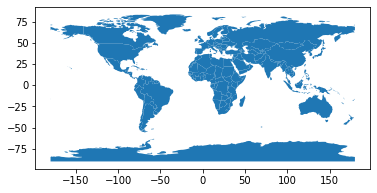

In [ ]:
world.plot();

In [ ]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
world.replace('Viet Nam', 'Vietnam', inplace = True)
world.replace('Brunei Darussalam', 'Brunei', inplace = True)
world.replace('Cape Verde', 'Cabo Verde', inplace = True)
world.replace('Democratic Republic of the Congo', 'Congo (Kinshasa)', inplace = True)
world.replace('Congo', 'Congo (Brazzaville)', inplace = True)
world.replace('Czech Republic', 'Czechia', inplace = True)
world.replace('Swaziland', 'Eswatini', inplace = True)
world.replace('Iran (Islamic Republic of)', 'Iran', inplace = True)
world.replace('Korea, Republic of', 'Korea, South', inplace = True)
world.replace("Lao People's Democratic Republic", 'Laos', inplace = True)
world.replace('Libyan Arab Jamahiriya', 'Libya', inplace = True)
world.replace('Republic of Moldova', 'Moldova', inplace = True)
world.replace('The former Yugoslav Republic of Macedonia', 'North Macedonia', inplace = True)
world.replace('Syrian Arab Republic', 'Syria', inplace = True)
world.replace('Taiwan', 'Taiwan*', inplace = True)
world.replace('United Republic of Tanzania', 'Tanzania', inplace = True)
world.replace('United States', 'US', inplace = True)
world.replace('Palestine', 'West Bank and Gaza', inplace = True)
print('I am runed....')

I am runed....


In [ ]:
# Merging the 'data' with 'world' geopandas geodataframe
merge = world.join(data, on = 'name', how = 'right')

#image_frames = []
#world.plot()
print(merge.head())
print(merge.shape)
print(world.shape)

        pop_est      continent        name  ... 4/13/20  4/14/20 4/15/20
0.0    920938.0        Oceania        Fiji  ...      16       16      16
1.0  53950935.0         Africa    Tanzania  ...      49       53      88
3.0  35623680.0  North America      Canada  ...   25679    27034   28208
5.0  18556698.0           Asia  Kazakhstan  ...    1091     1232    1295
6.0  29748859.0           Asia  Uzbekistan  ...     998     1165    1302

[5 rows x 91 columns]
(185, 91)
(177, 6)


In [ ]:
for index, row in data.iterrows():
  if index not in world['name'].to_list():
    print(index + " : is not in list")
  else:
    pass

Andorra : is not in list
Antigua and Barbuda : is not in list
Bahrain : is not in list
Barbados : is not in list
Bosnia and Herzegovina : is not in list
Burma : is not in list
Cabo Verde : is not in list
Central African Republic : is not in list
Congo (Kinshasa) : is not in list
Cote d'Ivoire : is not in list
Diamond Princess : is not in list
Dominica : is not in list
Dominican Republic : is not in list
Equatorial Guinea : is not in list
Eswatini : is not in list
Grenada : is not in list
Holy See : is not in list
Korea, South : is not in list
Liechtenstein : is not in list
MS Zaandam : is not in list
Maldives : is not in list
Malta : is not in list
Mauritius : is not in list
Monaco : is not in list
North Macedonia : is not in list
Saint Kitts and Nevis : is not in list
Saint Lucia : is not in list
Saint Vincent and the Grenadines : is not in list
San Marino : is not in list
Sao Tome and Principe : is not in list
Seychelles : is not in list
Singapore : is not in list
South Sudan : is no

In [ ]:
world.keys()

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

In [ ]:
pip install mapclassify

AttributeError: ignored

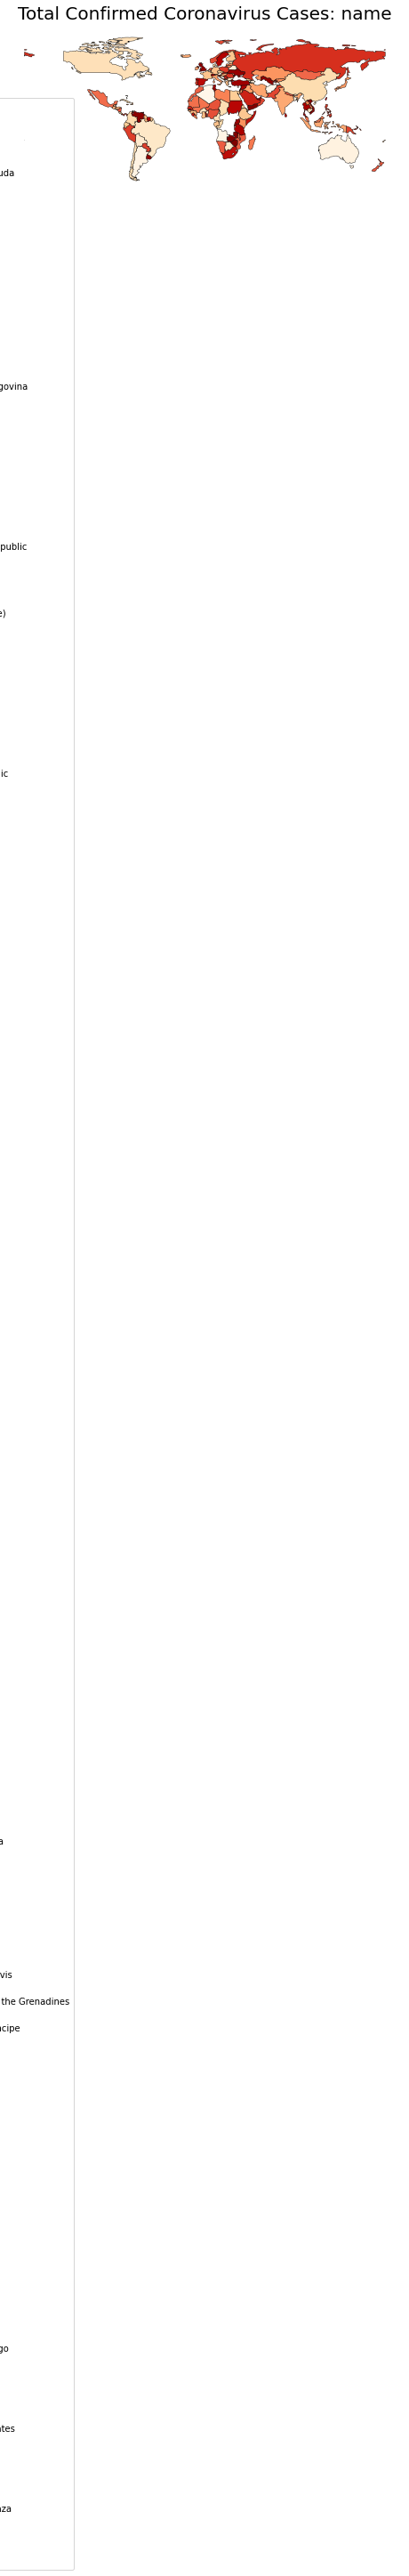

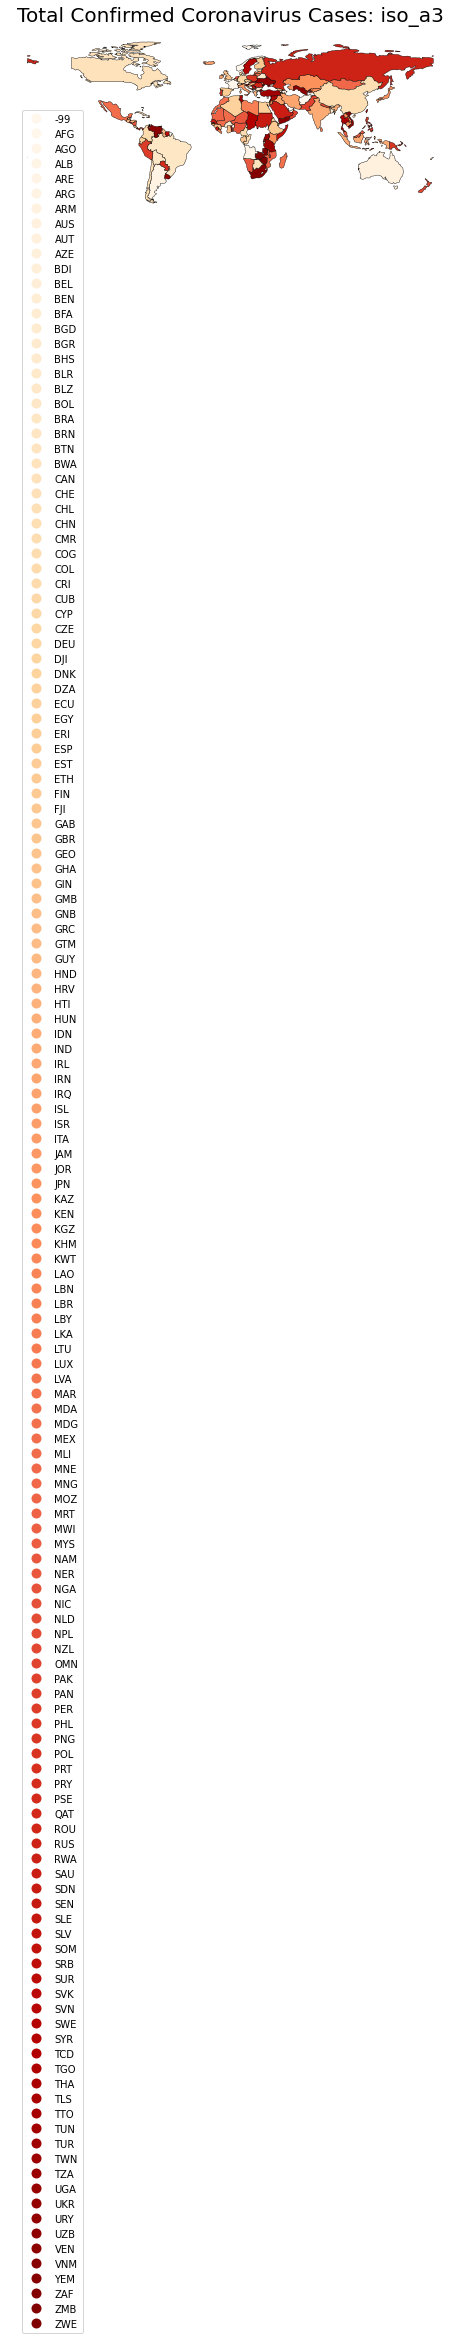

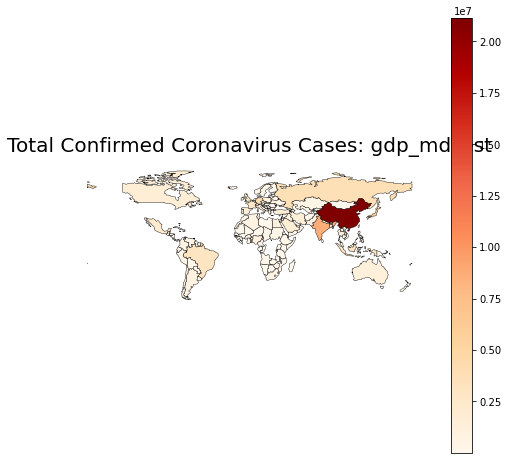

In [ ]:
import mapclassify
image_frames = []

for dates in merge.columns.to_list()[2:87]:
  
    # Plot 
    ax = merge.plot(column = dates, 
                    cmap = 'OrRd', 
                    figsize = (8,8), 
                    legend = True,
                    #scheme = 'user_defined', 
                    classification_kwds = {'bins':[10, 20, 50, 100, 500, 1000, 5000, 10000, 500000]}, 
                    edgecolor = 'black',
                    linewidth = 0.4)
    
    # Add a title to the map 
    ax.set_title('Total Confirmed Coronavirus Cases: '+ dates, fontdict = 
                 {'fontsize':20}, pad = 12.5)
    
    # Removing the axes
    ax.set_axis_off()
    
    # Move the legend 
    ax.get_legend().set_bbox_to_anchor((0.18, 0.6))
    
    img = ax.get_figure()
    
    
    f = io.BytesIO()
    img.savefig(f, format = 'png', bbox_inches = 'tight')
    f.seek(0)
    image_frames.append(PIL.Image.open(f))


# Create a GIF animation 
image_frames[0].save('Dynamic COVID-19 Map.gif', format = 'GIF',
            append_images = image_frames[1:], 
            save_all = True, duration = 300, 
            loop = 3)

f.close()

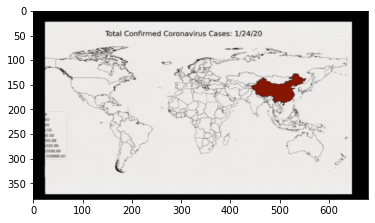

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("/content/World final.gif")
plt.imshow(img)

# New Section